<a href="https://colab.research.google.com/github/MargaritaKotova/Tensorflow-2.0-Deep-Learning-and-Artificial-Intelligence-course/blob/master/ANN_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
 !pip install "tensorflow>=2.0.0"
 import tensorflow as tf
print(tf.__version__)

     |████████████████████████████████| 421.8MB 36kB/s 
     |████████████████████████████████| 3.9MB 31.6MB/s 
     |████████████████████████████████| 450kB 53.7MB/s 
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1
  Found existing installation: tensorflow 1.15.0
    Uninstalling tensorflow-1.15.0:
      Successfully uninstalled tensorflow-1.15.0
2.1.0


In [2]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
type(x_train)

numpy.ndarray

In [5]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [7]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [8]:
#train set has 60000 images , each of them has size 28 x 28 pixels:
x_train.shape

(60000, 28, 28)

In [0]:
x_train, x_test = x_train/255.0, x_test/255.0

In [0]:
#Build the model
model = tf.keras.models.Sequential([
        tf.keras.layers.Flatten(input_shape=(28,28)),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(10, activation='softmax')              
])

In [0]:
#Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy']
              )

In [14]:
#Train the model
r = model.fit(x_train, y_train, validation_data = (x_test,y_test), epochs = 10)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 88us/sample - loss: 0.2975 - accuracy: 0.9139 - val_loss: 0.1426 - val_accuracy: 0.9564
Epoch 2/10
60000/60000 [==============================] - 5s 81us/sample - loss: 0.1435 - accuracy: 0.9563 - val_loss: 0.1059 - val_accuracy: 0.9679
Epoch 3/10
60000/60000 [==============================] - 5s 81us/sample - loss: 0.1098 - accuracy: 0.9664 - val_loss: 0.0910 - val_accuracy: 0.9721
Epoch 4/10
60000/60000 [==============================] - 5s 80us/sample - loss: 0.0881 - accuracy: 0.9735 - val_loss: 0.0810 - val_accuracy: 0.9748
Epoch 5/10
60000/60000 [==============================] - 5s 81us/sample - loss: 0.0764 - accuracy: 0.9759 - val_loss: 0.0780 - val_accuracy: 0.9751
Epoch 6/10
60000/60000 [==============================] - 5s 81us/sample - loss: 0.0651 - accuracy: 0.9797 - val_loss: 0.0770 - val_accuracy: 0.9768
Epoch 7/10
60000/60000 [==============================] 

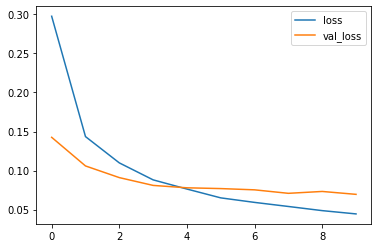

In [15]:
import matplotlib.pyplot as plt

plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

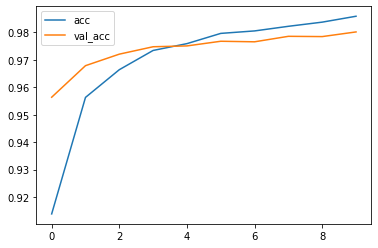

In [16]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [17]:
print(model.evaluate(x_test,y_test))

10000/10000 [==============================] - 0s 44us/sample - loss: 0.0696 - accuracy: 0.9802
[0.06957957409241353, 0.9802]


Confusion matrix without  normalization
[[ 970    1    2    0    1    1    3    1    1    0]
 [   0 1123    4    0    0    0    2    0    6    0]
 [   1    1 1009    1    3    0    3    7    7    0]
 [   0    0    3  988    0    6    0    7    4    2]
 [   0    0    1    1  955    0    5    3    2   15]
 [   3    0    0    5    1  870    3    0    8    2]
 [   3    2    1    1    5    1  943    0    2    0]
 [   3    2    9    0    0    0    0 1008    2    4]
 [   4    0    2    3    4    0    1    5  953    2]
 [   1    5    0    4    5    1    0    9    1  983]]


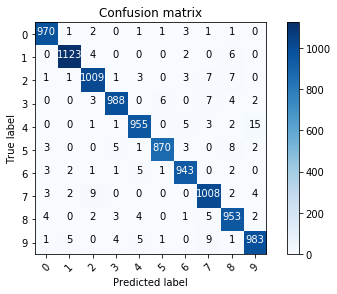

In [20]:
from sklearn.metrics import confusion_matrix

import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap = plt.cm.Blues):

  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print("Normalized confusion matrix")
  else:
    print("Confusion matrix without  normalization")

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
        horizontalalignment="center",
        color = "white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))



Text(0.5, 1.0, 'True label: 6 Predicted: 4')

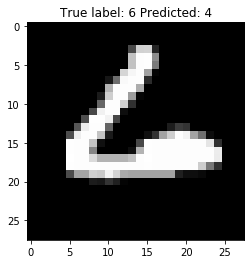

In [21]:
#Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (y_test[i], p_test[i]))